In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install jpype1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 5.5 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
import re
import nltk
nltk.download("stopwords")  #downloading stopwords
nltk.download('punkt')
nltk.download('wordnet')
import nltk as nlp
import string
from nltk import word_tokenize,sent_tokenize
from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

import seaborn as sns

from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ensar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ensar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ensar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [6]:
import urllib.request
import os
import tempfile
import sys
import fileinput
import logging
import jpype

In [7]:
df = pd.read_csv("7allV03.csv")
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [9]:
df.describe()

,category,text
count,4900,4900
unique,7,4539
top,siyaset,messi nin emzik sürpriz bozuldu ! barcelona n...
freq,700,5


In [15]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(df.category)

y

array([4, 4, 4, ..., 6, 6, 6])

In [ ]:
print(jpype.java.lang.System.getProperty('java.class.path'))

In [ ]:
def tokenizasyon(text):
    return word_tokenize(text)
def lemmatizer(text):
    lemma_words = []
    ZEMBEREK_PATH2 = r'zemberek-full.jar'
    if jpype.isJVMStarted() is False:
        startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH2))
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
        lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
        lemma_words.append(lemma_word)
    text = ' '.join(lemma_words)
    return text

def convert_lowercase(text):
    return text.lower()
def remove_punctuation(text):
    return ''.join(d for d in text if d not in string.punctuation)
def remove_stopwords(text):
    stopwords = []
    with open(r'stopwords.txt', 'r',encoding='utf-8') as f:
        for word in f:
            word = word.split('\n')
            stopwords.append(word[0])
    clean_text = ' '.join(s for  s in text.split() if s not in stopwords)
    return clean_text
def remove_numbers(text):
    text = re.sub(r'\d', '', text)
    return text
def remove_less_than_2(text):
    text = ' '.join([w for w in text.split() if len(w)>2])
    return text
def remove_extra_space(text):
    ornek_text_strip = re.sub(' +', ' ', text)
    return ornek_text_strip.strip()

In [ ]:
print(jpype.java.lang.System.getProperty('java.class.path'))

In [ ]:
df['text'] = df['text'].apply(lemmatizer)
df['text'] = df['text'].apply(convert_lowercase)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(remove_extra_space)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_less_than_2)

In [ ]:
texts = []
for text in df.text:
    texts.append(text)

In [ ]:
texts

In [ ]:
with open("/content/drive/MyDrive/MachineLearning/onderhoca/kelimeler.txt", 'w') as f:
    for s in texts:
        f.write(str(s) + '\n')

In [11]:
# önişlenmiş verileri çağırıyorum
with open("kelimeler.txt", 'r') as f:
    kelimeler = [line.rstrip('\n') for line in f]

kelimeler

['seçim vaat mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun unk aday unk kürsü bekle yap tezahürat ıslıkla üzeri divan başkan unk mhp unk genel başkan genel başkan aday saygıdeğer salon ciddi zor taşkın izin ver salon sükunet sağla konuş başla vurgula türkeş unk unk kurultay konuş aday ikinci konuş yap açıkla konuş kurultay mhp unk baş iktidar vesile dile aydın unk unk mhp eleştir kale fethet yol devam söyle hatırla iktidar basın sivil toplum sus ifade unk unk bürokrasi taş üst taş bırak ileri sür aydın ülkü düşman kabul kıyma makine geçir zihniyet sürgün ora bura sal bürokrasi ülkü kadro savaş yaşa skandal ardından devlet çete mantık yönet siyasi iktidar savun aydın iktidar belediye sahte rapor dinle sal savun aydın arka habur dan içeri sok vatan hain karşıla tören yet oslo terörist kur paza

# **EĞİTİM VE TEST**

TFidfVectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features=500 # "number" most common(used) words in reviews
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X = tfidf.fit_transform(kelimeler).toarray()

In [13]:
X.shape

(4900, 5000)

In [16]:
y

array([4, 4, 4, ..., 6, 6, 6])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

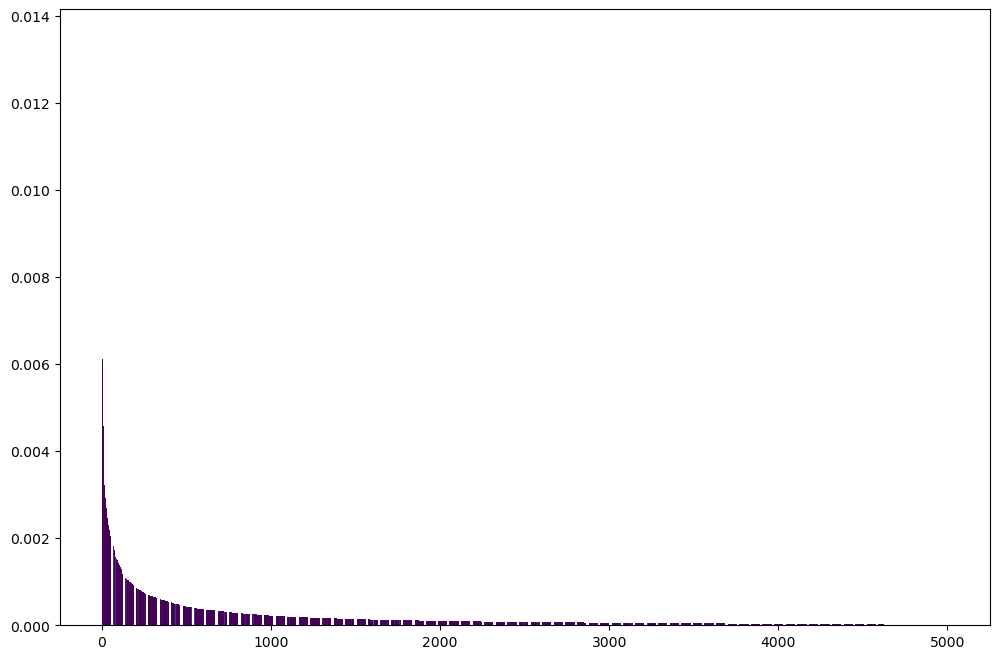

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

# ExtraTreesClassifier modelini oluştur
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X, y)

# Öznitelik önemlerini al
feature_importances = et_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]

# Görselleştirme için renk paleti seçimi
colors = plt.cm.viridis(feature_importances / max(feature_importances))

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center", color=colors)
plt.xticks(range(len(sorted_idx)), X.columns[sorted_idx], rotation=45, ha="right")
plt.xlabel("Öznitelik")
plt.ylabel("Önem Derecesi")
plt.title("ExtraTreesClassifier Öznitelik Önemleri")

# Renkli okları en yüksek ve en düşük özniteliklere ekleme
max_importance_idx = sorted_idx[0]
min_importance_idx = sorted_idx[-1]

plt.arrow(max_importance_idx, 0.13, 0, -0.04, head_width=0.2, head_length=0.01, fc='red', ec='red')
plt.arrow(min_importance_idx, 0.01, 0, 0.04, head_width=0.2, head_length=0.01, fc='red', ec='red')

# Renk çubuğu ekleme
color_bar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), orientation='vertical')
color_bar.set_label('Önem Derecesi (Normalized)', rotation=270, labelpad=15)

# Öznitelik değerlerini çubukların üzerine ekleme
for bar, importance in zip(bars, feature_importances[sorted_idx]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.005,
             f"{importance:.3f}", color="black", fontsize=9)

plt.tight_layout()
plt.show()

In [23]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02482011, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
veri = X

duz_veri = veri.flatten()

duz_veri = np.round(duz_veri).astype('int64')

# Mod hesaplama
mod = np.bincount(duz_veri).argmax()

# Diğer istatistikleri hesaplamak için Numpy fonksiyonlarını kullanabilirsiniz
medyan = np.median(duz_veri)
ortalama = np.mean(duz_veri)
standart_sapma = np.std(duz_veri)
varyans = np.var(duz_veri)
kovaryans = np.cov(duz_veri)
korelasyon = np.corrcoef(duz_veri)

# Elde edilen sonuçları görüntüle
print("Mod:", mod)
print("Medyan:", medyan)
print("Aritmetik Ortalama:", ortalama)
print("Standart Sapma:", standart_sapma)
print("Varyans:", varyans)
print("Kovaryans:\n", kovaryans)
print("Korelasyon:\n", korelasyon)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **SINIFLANDIRMALAR**

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       131
           1       0.78      0.82      0.80       142
           2       0.83      0.91      0.87       139
           3       0.88      0.93      0.91       122
           4       0.87      0.65      0.75       158
           5       0.91      0.95      0.93       147
           6       0.81      0.87      0.84       141

    accuracy                           0.84       980
   macro avg       0.84      0.84      0.84       980
weighted avg       0.84      0.84      0.84       980

Knn Accuracy değeri: 84.08163265306122
Knn Precision değeri: 79.06976744186046
Knn Recall değeri: 77.86259541984732
Knn F1 Score değeri: 78.46153846153847
MAE değeri: 0.463265306122449
MSE değeri: 1.6959183673469387
RMSE değeri: 1.3022743057232369


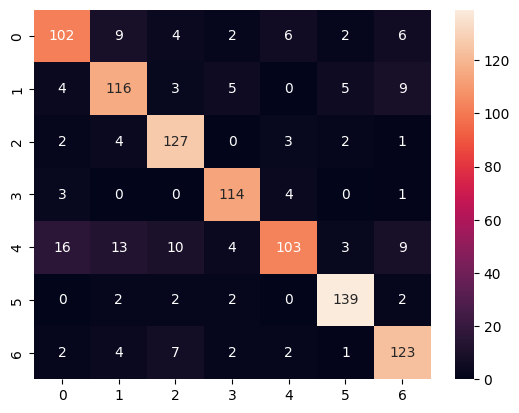

In [ ]:
#KNN
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(classification_report(y_test,y_pred))

# Accuracy
knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn Accuracy değeri:",knnDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Knn Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Knn Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("Knn F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

In [ ]:
#KNN
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanKNN = accuracy.mean()*100
print('Accuracy', accMeanKNN)

precision = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='precision')
precision = precision.mean()*100
print('Precision', precision)

recall = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='recall')
recall = recall.mean()*100
print('Recall', recall)

f1_score = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='f1')
f1_score = f1_score.mean()*100
print('F1_score', f1_score)

MAE = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring="neg_mean_absolute_error")
MAE = MAE.mean()
print('MAE değeri', np.abs(MAE) )

MSE = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE = MSE.mean()
print('MAE değeri', np.abs(MSE) )

# RMSE
RMSE = np.sqrt( np.abs(MSE) )
print("RMSE değeri:",RMSE)

Accuracy 82.98469387755102
Precision nan
Recall nan
F1_score nan
MAE değeri 0.514030612244898
MAE değeri 1.931887755102041
RMSE değeri: 1.3899236508175696


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       131
           1       0.88      0.89      0.88       142
           2       0.90      0.94      0.92       139
           3       0.92      0.99      0.96       122
           4       0.89      0.87      0.88       158
           5       0.98      0.96      0.97       147
           6       0.90      0.90      0.90       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

Logistik Regresyon doğruluk: 90.71428571428571
Precision değeri: 86.88524590163934
Recall değeri: 80.91603053435115
F1 Score değeri: 83.79446640316205
MAE değeri: 0.2969387755102041
MSE değeri: 1.1581632653061225
RMSE değeri: 1.076179940951383


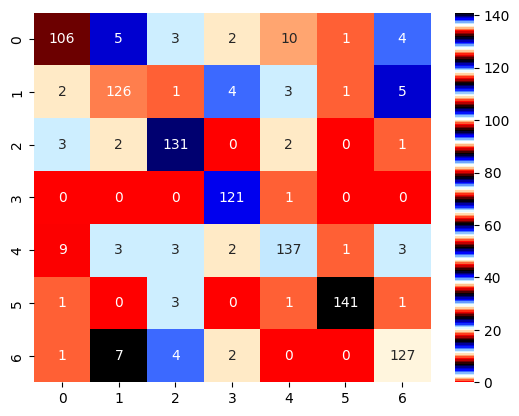

In [ ]:
#LogisticRegression
warnings.filterwarnings('ignore')

logr = LogisticRegression()
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
logDogruluk=accuracy_score(y_test,y_pred)
print("Logistik Regresyon doğruluk:", logDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f",cmap='flag')
plt.show()

In [ ]:
#LogisticRegression
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanlogr = accuracy.mean()*100
print('Accuracy', accMeanlogr)

precision = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='precision')
precision = precision.mean()*100
print('Precision', precision)

recall = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='recall')
recall = recall.mean()*100
print('Recall', recall)

f1_score = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='f1')
f1_score = f1_score.mean()*100
print('F1_score', f1_score)

MAE = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring="neg_mean_absolute_error")
MAE = MAE.mean()
print('MAE değeri', np.abs(MAE) )

MSE = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE = MSE.mean()
print('MAE değeri', np.abs(MSE) )

# RMSE
RMSE = np.sqrt( np.abs(MSE) )
print("RMSE değeri:",RMSE)

Accuracy 89.66836734693878
Precision nan
Recall nan
F1_score nan
MAE değeri 0.33520408163265303
MAE değeri 1.321938775510204
RMSE değeri: 1.1497559634592915


              precision    recall  f1-score   support

           0       0.63      0.60      0.61       131
           1       0.56      0.60      0.58       142
           2       0.76      0.81      0.78       139
           3       0.85      0.84      0.84       122
           4       0.68      0.61      0.64       158
           5       0.92      0.83      0.87       147
           6       0.63      0.71      0.67       141

    accuracy                           0.71       980
   macro avg       0.72      0.71      0.71       980
weighted avg       0.72      0.71      0.71       980

Decision Tree doğruluk: 71.12244897959184
Precision değeri: 62.903225806451616
Recall değeri: 59.541984732824424
F1 Score değeri: 61.17647058823529
MAE değeri: 0.8642857142857143
MSE değeri: 3.2438775510204083
RMSE değeri: 1.801076775437518


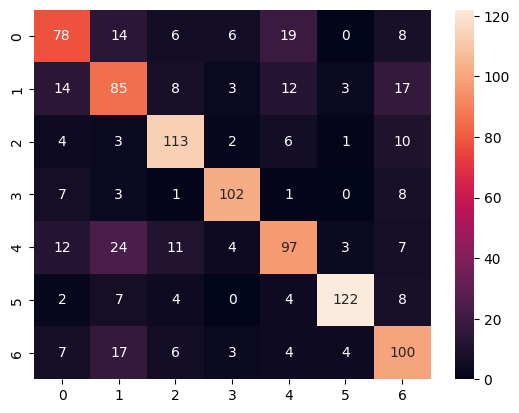

In [ ]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dtDogruluk=accuracy_score(y_test,y_pred)
print("Decision Tree doğruluk:", dtDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#DecisionTreeClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = dt, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanDT = accuracy.mean()*100
print('Accuracy', accMeanDT)

Accuracy 72.14285714285714


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       131
           1       0.87      0.88      0.87       142
           2       0.94      0.93      0.93       139
           3       0.94      0.97      0.95       122
           4       0.90      0.87      0.89       158
           5       0.99      0.95      0.97       147
           6       0.90      0.91      0.90       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

SVM doğruluk: 91.02040816326532
Precision değeri: 83.33333333333334
Recall değeri: 87.78625954198473
F1 Score değeri: 85.50185873605949
MAE değeri: 0.29285714285714287
MSE değeri: 1.1683673469387754
RMSE değeri: 1.0809104250301111


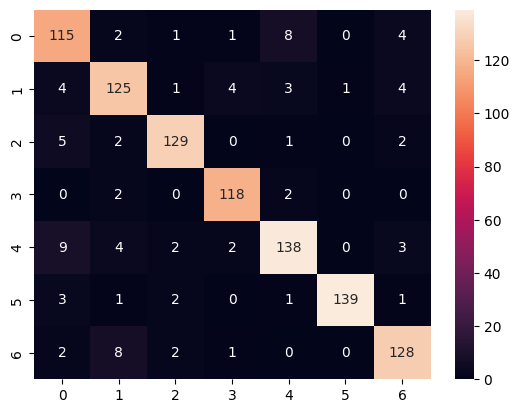

In [ ]:
#SVC
warnings.filterwarnings('ignore')

"""
svc için en iyi değerler
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
"""

dvm = SVC(probability=True)
dvm.fit(X_train,y_train)

y_pred=dvm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dvmDogruluk=accuracy_score(y_test,y_pred)
print("SVM doğruluk:", dvmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#SVC
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = dvm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanSVC = accuracy.mean()*100
print('Accuracy', accMeanSVC)


Accuracy 90.12755102040816


              precision    recall  f1-score   support

           0       0.77      0.62      0.69       131
           1       0.67      0.79      0.73       142
           2       0.79      0.79      0.79       139
           3       0.93      0.93      0.93       122
           4       0.71      0.82      0.76       158
           5       0.99      0.90      0.94       147
           6       0.84      0.80      0.82       141

    accuracy                           0.81       980
   macro avg       0.82      0.81      0.81       980
weighted avg       0.81      0.81      0.81       980

Gaussian NB doğruluk: 80.61224489795919
Precision değeri: 77.14285714285715
Recall değeri: 61.832061068702295
F1 Score değeri: 68.64406779661017
MAE değeri: 0.5918367346938775
MSE değeri: 2.216326530612245
RMSE değeri: 1.488733196584346


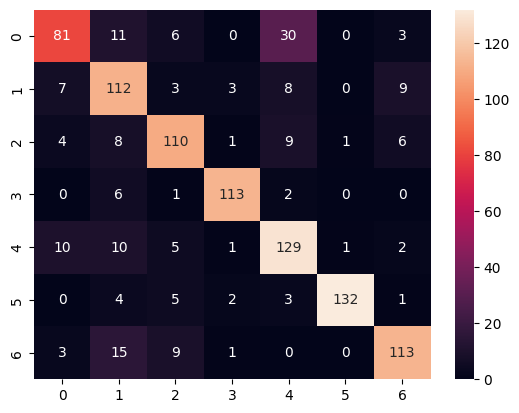

In [ ]:
#GaussianNB
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gnbDogruluk=accuracy_score(y_test,y_pred)
print("Gaussian NB doğruluk:", gnbDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#GaussianNB
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = gnb, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanGNB = accuracy.mean()*100
print('Accuracy', accMeanGNB)

Accuracy 80.17857142857142


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       131
           1       0.80      0.84      0.82       142
           2       0.86      0.92      0.89       139
           3       0.90      0.98      0.94       122
           4       0.87      0.81      0.84       158
           5       0.97      0.95      0.96       147
           6       0.87      0.83      0.85       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

RandomForest doğruluk: 87.14285714285714
Precision değeri: 81.25
Recall değeri: 79.38931297709924
F1 Score değeri: 80.30888030888032
MAE değeri: 0.38979591836734695
MSE değeri: 1.4775510204081632
RMSE değeri: 1.2155455649247227


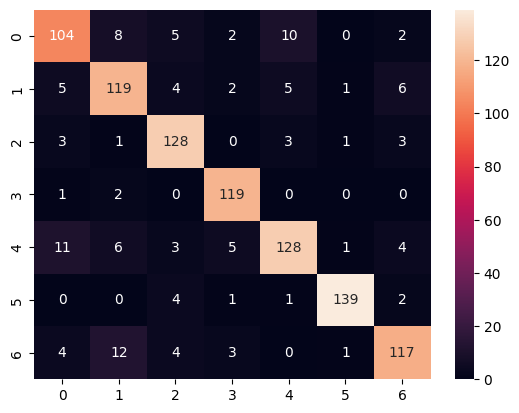

In [ ]:
#RandomForestClassifier
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
randomForestDogruluk=accuracy_score(y_test,y_pred)
print("RandomForest doğruluk:", randomForestDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [ ]:
#RandomForestClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = rfc, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanRFC = accuracy.mean()*100
print('Accuracy', accMeanRFC)

Accuracy 87.24489795918367


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       131
           1       0.87      0.87      0.87       142
           2       0.93      0.93      0.93       139
           3       0.92      0.98      0.95       122
           4       0.89      0.84      0.86       158
           5       0.99      0.97      0.98       147
           6       0.91      0.91      0.91       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

ANN doğruluk: 90.61224489795919
Precision değeri: 82.83582089552239
Recall değeri: 84.7328244274809
F1 Score değeri: 83.77358490566039
MAE değeri: 0.2897959183673469
MSE değeri: 1.1142857142857143
RMSE değeri: 1.0555973258234952


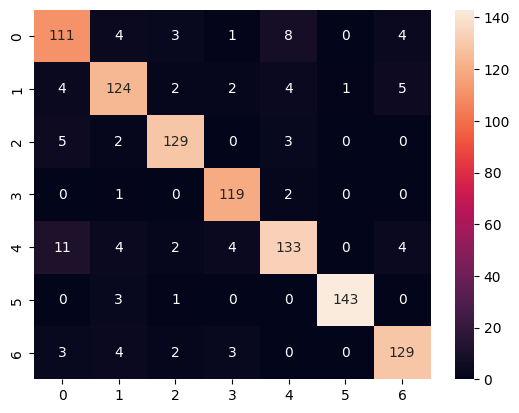

In [18]:
#Yapay Sinir Ağları(Artificial Nerual Network)

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc_params = {'alpha':[1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001 ],
              'hidden_layer_sizes': [(10,10), (100,100,100), (100,100), (3,5)]}

#mlpc = MLPClassifier(solver='lbfgs', activation='logistic')

#mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train_scaler, y_train)
#mlpc_cv_model
#mlpc_cv_model.best_params_


mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
annDogruluk=accuracy_score(y_test,y_pred)
print("ANN doğruluk:", annDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [19]:
#ANN

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = mlpc, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanANN = accuracy.mean()*100
print('Accuracy', accMeanANN)

Accuracy 90.43367346938774


              precision    recall  f1-score   support

           0       0.58      0.56      0.57       131
           1       0.59      0.60      0.59       142
           2       0.77      0.83      0.80       139
           3       0.84      0.82      0.83       122
           4       0.66      0.65      0.65       158
           5       0.91      0.85      0.88       147
           6       0.65      0.70      0.68       141

    accuracy                           0.71       980
   macro avg       0.72      0.71      0.71       980
weighted avg       0.72      0.71      0.71       980

CART doğruluk: 71.3265306122449
Precision değeri: 58.4
Recall değeri: 55.72519083969466
F1 Score değeri: 57.03125
MAE değeri: 0.8683673469387755
MSE değeri: 3.303061224489796
RMSE değeri: 1.8174325914569145


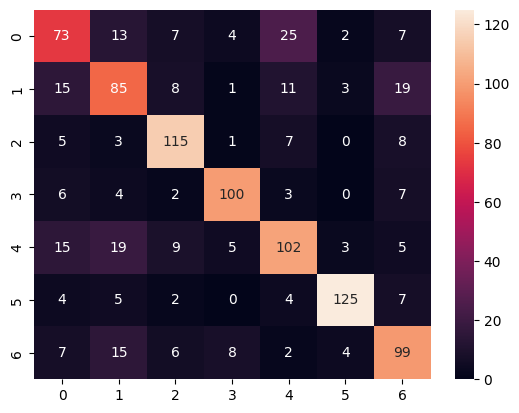

In [17]:
# CART (Classification and Regression Tree)

from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
cartDogruluk=accuracy_score(y_test,y_pred)
print("CART doğruluk:", cartDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [ ]:
#CART

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = cart, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanCART = accuracy.mean()*100
print('Accuracy', accMeanCART)

Accuracy 71.27551020408164


              precision    recall  f1-score   support

           0       0.79      0.82      0.80       131
           1       0.80      0.85      0.82       142
           2       0.90      0.93      0.91       139
           3       0.92      0.93      0.93       122
           4       0.90      0.82      0.85       158
           5       0.97      0.90      0.93       147
           6       0.84      0.86      0.85       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

GBM doğruluk: 87.04081632653062
Precision değeri: 78.67647058823529
Recall değeri: 81.67938931297711
F1 Score değeri: 80.1498127340824
MAE değeri: 0.41122448979591836
MSE değeri: 1.623469387755102
RMSE değeri: 1.2741543814448475


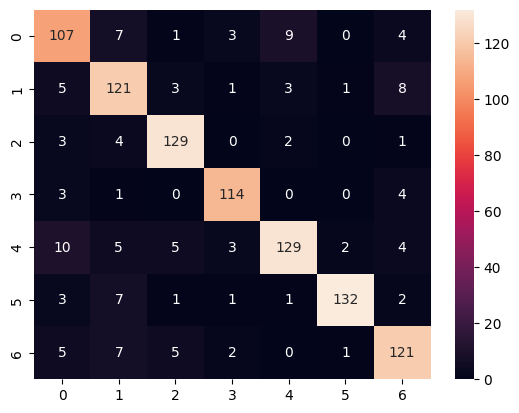

In [ ]:
# Gradient Boosting Machine(GBM)

from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gbmDogruluk=accuracy_score(y_test,y_pred)
print("GBM doğruluk:", gbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#GBM

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = gbm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanGBM = accuracy.mean()*100
print('Accuracy', accMeanGBM)


Accuracy 86.60714285714285


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       131
           1       0.82      0.87      0.85       142
           2       0.88      0.94      0.91       139
           3       0.92      0.95      0.94       122
           4       0.91      0.80      0.85       158
           5       0.96      0.91      0.93       147
           6       0.87      0.87      0.87       141

    accuracy                           0.88       980
   macro avg       0.88      0.89      0.88       980
weighted avg       0.89      0.88      0.88       980

xgboost doğruluk: 88.36734693877551
Precision değeri: 83.82352941176471
Recall değeri: 87.02290076335878
F1 Score değeri: 85.39325842696628
MAE değeri: 0.3469387755102041
MSE değeri: 1.2938775510204081
RMSE değeri: 1.1374873849939646


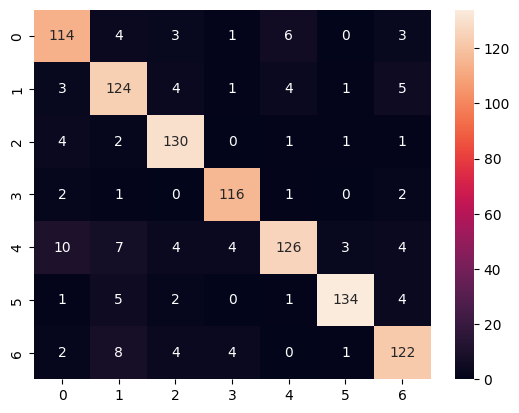

In [ ]:
# eXtreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
xgboostDogruluk=accuracy_score(y_test,y_pred)
print("xgboost doğruluk:", xgboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# xgboost

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = xgboost, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanXGBOOST = accuracy.mean()*100
print('Accuracy', accMeanXGBOOST)


Accuracy 87.52551020408163


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128569
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 4087
[LightGBM] [Info] Start training from score -1.929966
[LightGBM] [Info] Start training from score -1.949488
[LightGBM] [Info] Start training from score -1.944126
[LightGBM] [Info] Start training from score -1.914273
[LightGBM] [Info] Start training from score -1.978581
[LightGBM] [Info] Start training from score -1.958489
[LightGBM] [Info] Start training from score -1.947697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       131
           1       0.82      0.86      0.84       142
           2       0.87      0.93      0.90       139
           3       0.93      0.94     

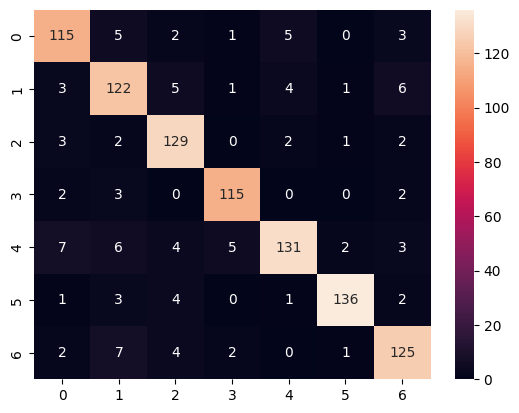

In [ ]:
# LightGBM

from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)

y_pred = lightgbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
lightgbmDogruluk=accuracy_score(y_test,y_pred)
print("LightGBM doğruluk:", lightgbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# LightGBM

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = lightgbm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanLGBM = accuracy.mean()*100
print('Accuracy', accMeanLGBM)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116382
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 3841
[LightGBM] [Info] Start training from score -1.930162
[LightGBM] [Info] Start training from score -1.949886
[LightGBM] [Info] Start training from score -1.943928
[LightGBM] [Info] Start training from score -1.914658
[LightGBM] [Info] Start training from score -1.978171
[LightGBM] [Info] Start training from score -1.957886
[LightGBM] [Info] Start training from score -1.947896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.160836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, 

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       131
           1       0.83      0.88      0.86       142
           2       0.84      0.92      0.88       139
           3       0.94      0.93      0.93       122
           4       0.91      0.82      0.86       158
           5       0.97      0.90      0.93       147
           6       0.85      0.85      0.85       141

    accuracy                           0.88       980
   macro avg       0.88      0.88      0.88       980
weighted avg       0.88      0.88      0.88       980

CatBoost doğruluk: 87.75510204081633
Precision değeri: 81.29496402877699
Recall değeri: 86.25954198473282
F1 Score değeri: 83.7037037037037
MAE değeri: 0.3826530612244898
MSE değeri: 1.4806122448979593
RMSE değeri: 1.2168041111444188


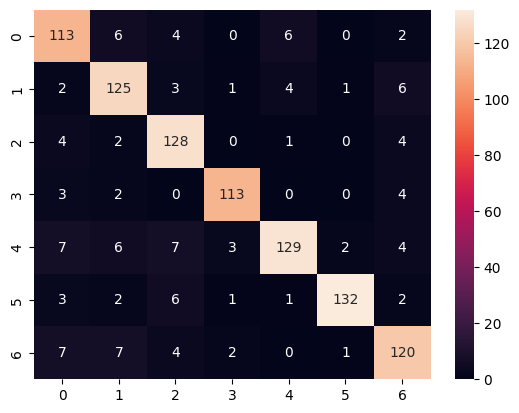

In [ ]:
# Category Boosting (CatBoost)

from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train, verbose=False)

y_pred = catboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
catboostDogruluk=accuracy_score(y_test,y_pred)
print("CatBoost doğruluk:", catboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# CatBoost

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracyCatB = cross_val_score(estimator = catboost, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanCatB = accuracyCatB.mean()*100
print('Accuracy', accMeanCatB)


In [20]:
# sonuçları almak uzun sürdüğü için tek seferde tüm sonuçları alamadığım için değerleri el ile girdim

logDogruluk = 90.71428571428571
dtDogruluk = 71.12244897959184
randomForestDogruluk = 87.14285714285714
dvmDogruluk = 91.02040816326532
knnDogruluk = 84.08163265306122
gnbDogruluk = 80.61224489795919
annDogruluk = 90.20408163265307
cartDogruluk = 71.3265306122449
gbmDogruluk = 87.04081632653062
xgboostDogruluk = 88.36734693877551
lightgbmDogruluk = 89.08163265306122
catboostDogruluk = 87.75510204081633

In [33]:
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                   'CatBoost'
                                   ],
                        'Score':[ logDogruluk,dtDogruluk,randomForestDogruluk,dvmDogruluk,knnDogruluk,gnbDogruluk,annDogruluk,cartDogruluk,gbmDogruluk,xgboostDogruluk,lightgbmDogruluk,catboostDogruluk ] })

modeller

,Model,Score
0,Logistik Regresyon,90.714286
1,Karar Ağaçları,71.122449
2,Rastgele Orman,87.142857
3,Destek Vektör Makinesi,91.020408
4,K-en yakın komşu,84.081633
5,Gaussian NB,80.612245
6,ANN,90.204082
7,CART,71.326531
8,GBM,87.040816
9,XGBoost,88.367347


In [34]:
model_sort = modeller.sort_values(by='Score',ascending=False)
model_sort

,Model,Score
3,Destek Vektör Makinesi,91.020408
0,Logistik Regresyon,90.714286
6,ANN,90.204082
10,LightGBM,89.081633
9,XGBoost,88.367347
11,CatBoost,87.755102
2,Rastgele Orman,87.142857
8,GBM,87.040816
4,K-en yakın komşu,84.081633
5,Gaussian NB,80.612245


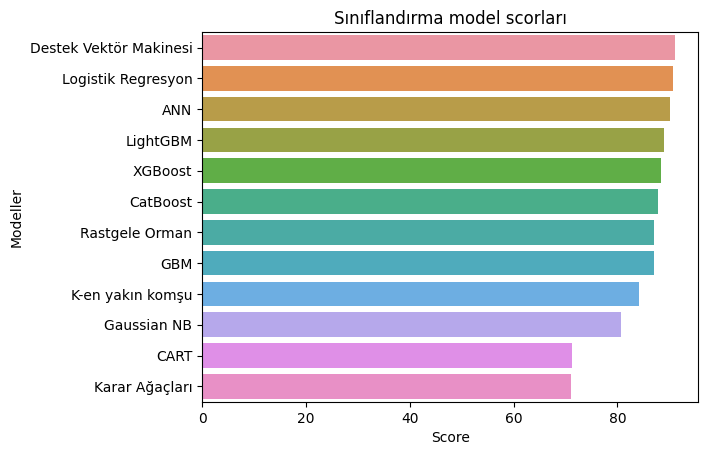

In [35]:
sns.barplot( x = model_sort.Score , y=model_sort.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()

In [25]:
# k-fold sonuçları
accMeanlogr = 89.66836734693878
accMeanDT = 72.14285714285714
accMeanRFC = 87.24489795918367
accMeanSVC = 90.12755102040816
accMeanKNN = 82.98469387755102
accMeanGNB = 80.17857142857142
accMeanANN = 90.43367346938774
accMeanCART = 71.27551020408164
accMeanGBM = 86.60714285714285
accMeanXGBOOST = 87.52551020408163
accMeanLGBM = 88.6734693877551
#accMeanCatB

In [26]:
#k-fold sonuçları
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                 ],
                        'Score':[accMeanlogr,accMeanDT,accMeanRFC,accMeanSVC,accMeanKNN,accMeanGNB,accMeanANN,accMeanCART,accMeanGBM,accMeanXGBOOST,accMeanLGBM]})
modeller

,Model,Score
0,Logistik Regresyon,89.668367
1,Karar Ağaçları,72.142857
2,Rastgele Orman,87.244898
3,Destek Vektör Makinesi,90.127551
4,K-en yakın komşu,82.984694
5,Gaussian NB,80.178571
6,ANN,90.433673
7,CART,71.275510
8,GBM,86.607143
9,XGBoost,87.525510


In [29]:
model_sort = modeller.sort_values(by='Score',ascending=False)
model_sort

,Model,Score
6,ANN,90.433673
3,Destek Vektör Makinesi,90.127551
0,Logistik Regresyon,89.668367
10,LightGBM,88.673469
9,XGBoost,87.525510
2,Rastgele Orman,87.244898
8,GBM,86.607143
4,K-en yakın komşu,82.984694
5,Gaussian NB,80.178571
1,Karar Ağaçları,72.142857


from matplotlib import pyplot as plt
_df_2['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

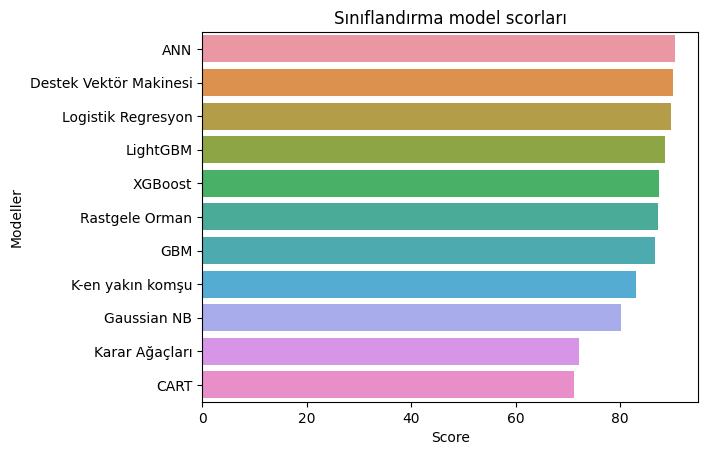

In [30]:
sns.barplot( x= model_sort.Score , y=model_sort.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()